<a href="https://colab.research.google.com/github/anthonymelson/portfolio/blob/master/N_Multi_Armed_Bandits_W_Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling for Multi-Armed Bandit Problem
This notebook shows how to solve a Multi-Armed Bandit problem with Thompson Sampling.  It is designed to make it easy to change the number of bandits and the ranges there win-probabilities fall in.  Additionally, it displays a table a histogram of the results and has highly descriptive code.  The hope is that it will help those who are not familiar with bandit problems or Thompson Sampling to understand how they work.



## What are Multi-Armed Bandit Problems?

Muli-Armed Bandit Problems are classical problems in reinforcement learning, where the player is offered the option to gamble on N-many slot machines, but where the machines all have potentially different payouts (win probabilities in this example).

The goal is for the player to maximize thier total reward, which requires them to "explore" the payouts by playing the machines while also "exploiting" what they have learned to maximize their reward.  Thompson Sampling is a suitable algorithm to balance this trade-off.

## Import Packages

In [0]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt


# Initialize Matrices and Counters
1. **N** =  Number of Machines (Bandits)
2. **machine_probs**  = Probability of Each Machine Winning
3. **rounds** = Total Plays
4. **wins** = Tracks Wins for Each Machine
5. **losses** = Tracks Losses for Each Machine
6. **total_reward** = Tracks Overall Wins for All Rounds
7. **machine_played** =  Tracks Total Plays for Each Machine

The bandits' probabilities are given by a random uniform selection that creates a different probability for each that lies between the low and high parameters.  The number of machines is modifiable by changing N.

This example uses 12 bandits, and sets the range for their win probabilities between 0.3 and 0.8, and allows for 700 rounds.  However, the code below will handel any number of bandits, any number of rounds, and any range where: 

$0 < lowerbound < upperbound < 1$

In [0]:
N = 12
machine_probs = np.random.uniform(low=0.3, high=0.8, size=N).round(2) 
rounds = 700 
wins = np.zeros(N) 
losses = np.zeros(N) 
total_reward = 0 
machine_played = [] 

## Thompson Sampling Algorithm (lay description)
1. Loops through number of rounds
2. Iterates through machines in each round
3. Samples from betavariate distribution (which changes based on rewards and becomes less random as the algorithm learns)
4. Selects machine based on sampling and comparision of scores
5. Plays machine given its actual probabilities
6. Gets reward based on outcome
7. Updates wins and losses (used to weight betavariate distribution in subsequent rounds) based on reward

In [0]:
# 1) Iterate Through Rounds
for i in range(0, rounds):
    probs = np.zeros(N) # Store Each Machine's Draw to be Played
    
    # 2) Iterate Through Machines
    for machine in range(0, N):
        probs[machine] = random.betavariate(wins[machine] + 1, losses[machine] + 1) # 3) Draw Based on Previous Results and Randomness

    selected_machine = np.argmax(probs) # 4) Machine With Best Draw
    machine_played.append(selected_machine) # Collect Machine With Best Draw
    
    # 5,6) Simulate Playing the Selected Machine, and Collect Reward
    reward = np.random.choice([0,1],1, p = [1 - machine_probs[selected_machine], machine_probs[selected_machine]])
    
    # 7) Count Wins, Losses, and Reward
    if reward == 1:
        wins[selected_machine] = wins[selected_machine] + 1
    else:
        losses[selected_machine] = losses[selected_machine] + 1
    total_reward = total_reward + reward



## Show Results in DataFrame

In [23]:
# Create and Print DataFrame with Wins, Losses, and Probabilities of Machine
df = pd.DataFrame(wins, columns=['Wins'])
df['Losses'] = losses
df['Actual Prob'] = machine_probs
display(df)
print()
# Print Most Wins, Actual Best, and Total Reward
print(f"Machine {np.argmax(wins)} won the most, with {int(wins[np.argmax(wins)])} wins")
print(f"Machine {np.argmax(machine_probs)} had the highest payout")
print(f"Total Reward: {total_reward[0]}")



,Wins,Losses,Actual Prob
0,4.0,7.0,0.32
1,14.0,11.0,0.46
2,297.0,105.0,0.70
3,6.0,8.0,0.35
4,5.0,8.0,0.60
5,41.0,25.0,0.54
6,0.0,4.0,0.32
7,5.0,7.0,0.50
8,8.0,9.0,0.38
9,77.0,35.0,0.67



Machine 2 won the most, with 297 wins
Machine 2 had the highest payout
Total Reward: 466


## Plot Results as Histogram

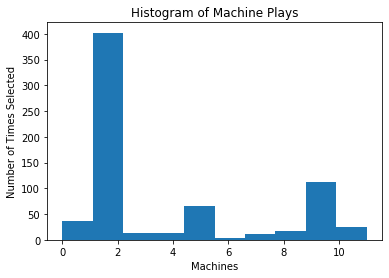

In [24]:
# Plot Histogram of Total Plays For Each Machine
plt.hist(machine_played)
plt.title('Histogram of Machine Plays')
plt.xlabel('Machines')
plt.ylabel('Number of Times Selected')
plt.show()